In [26]:
import os

In [27]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [28]:
# download the tiny shakespeare dataset
sufix="16maps"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_16maps_2sE_dataset_pretokenize/output_16maps_2sE.train.txt


In [29]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [30]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [31]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [32]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


In [33]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [34]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [35]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [36]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [37]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

OO: 2625
BB: 2539
KK: 2503
II: 2484
GG: 2478
HH: 2473
OOOOO: 2467
PP: 2455
OOOO: 2455
AA: 2450
JJ: 2443
DD: 2441
EE: 2434
CC: 2431
LL: 2414
MM: 2412
NN: 2410
IIII: 2393
GGGGG: 2389
JJJJJ: 2380
FF: 2369
KKKKK: 2324
DDD: 2312
DDDDD: 2294
CCCCC: 2292
MMMMM: 2285
IIIII: 2276
NNNNN: 2252
LLLLL: 2237
HHHHH: 2234
EEEEE: 2217
NNNN: 2214
MMMM: 2170
JJJ: 2160
GGGG: 2152
III: 2145
PPPPP: 2120
CCC: 2116
JJJJ: 2106
FFFFF: 2102
HHHH: 2098
OOOOOO: 2086
GGG: 2082
PPP: 2072
HHHHHH: 2071
GGGGGG: 2049
LLLLLL: 2047
KKK: 2044
NNNNNN: 2039
FFFFFF: 2039
DDDDDD: 2039
BBBBBB: 2038
CCCCCC: 2017
IIIIII: 2004
KKKK: 1973
MMMMMM: 1972
AAAAAA: 1968
JJJJJJ: 1967
KKKKKK: 1949
DDDD: 1940
OOO: 1933
MMM: 1926
PPPPPP: 1919
EEEEEE: 1885
NNN: 1839
AAAAAAA: 1820
BBBBBBB: 1800
AAAAA: 1795
HHHHHHH: 1790
DDDDDDD: 1783
LLLLLLL: 1751
BBBBB: 1750
OOOOOOO: 1745
PPPPPPP: 1743
KKKKKKK: 1739
FFFFFFF: 1732
MMMMMMM: 1721
EEEE: 1719
EEEEEEE: 1718
GGGGGGG: 1703
CCCCCCC: 1694
CCCC: 1677
IIIIIII: 1642
EEE: 1639
NNNNNNN: 1625
JJJJJJJ: 1596
B

In [38]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

28: 2625
22: 2539
27: 2503
35: 2484
33: 2478
23: 2473
75: 2467
29: 2455
44: 2455
25: 2450
37: 2443
31: 2441
36: 2434
34: 2431
26: 2414
32: 2412
30: 2410
50: 2393
80: 2389
88: 2380
24: 2369
77: 2324
66: 2312
79: 2294
82: 2292
95: 2285
86: 2276
91: 2252
74: 2237
85: 2234
84: 2217
46: 2214
48: 2170
68: 2160
49: 2152
69: 2145
76: 2120
64: 2116
53: 2106
87: 2102
39: 2098
108: 2086
62: 2082
63: 2072
104: 2071
112: 2049
105: 2047
59: 2044
110: 2039
106: 2039
111: 2039
102: 2038
113: 2017
115: 2004
43: 1973
116: 1972
103: 1968
117: 1967
109: 1949
47: 1940
61: 1933
65: 1926
107: 1919
114: 1885
60: 1839
119: 1820
120: 1800
83: 1795
118: 1790
127: 1783
122: 1751
72: 1750
125: 1745
123: 1743
124: 1739
121: 1732
128: 1721
52: 1719
133: 1718
129: 1703
131: 1694
51: 1677
130: 1642
67: 1639
126: 1625
132: 1596
89: 1522
73: 1515
71: 1487
70: 1464
57: 1456
56: 1441
92: 1440
45: 1435
90: 1435
96: 1429
99: 1415
93: 1411
97: 1392
94: 1383
100: 1382
101: 1378
81: 1354
138: 1354
78: 1352
42: 1329
135: 1327
5

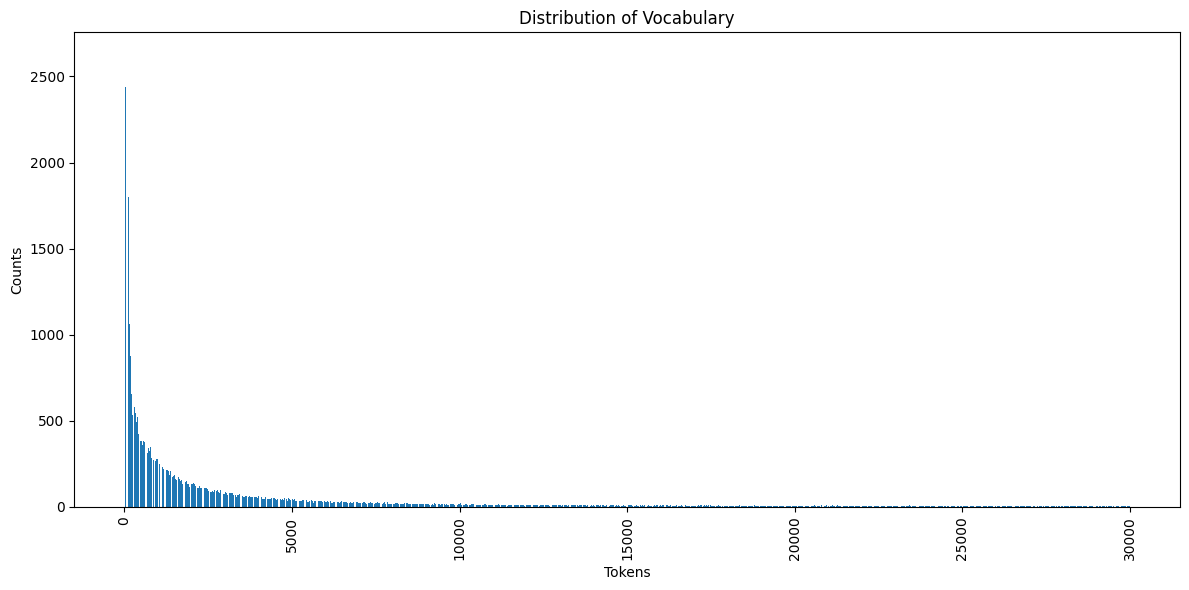

In [39]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [40]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


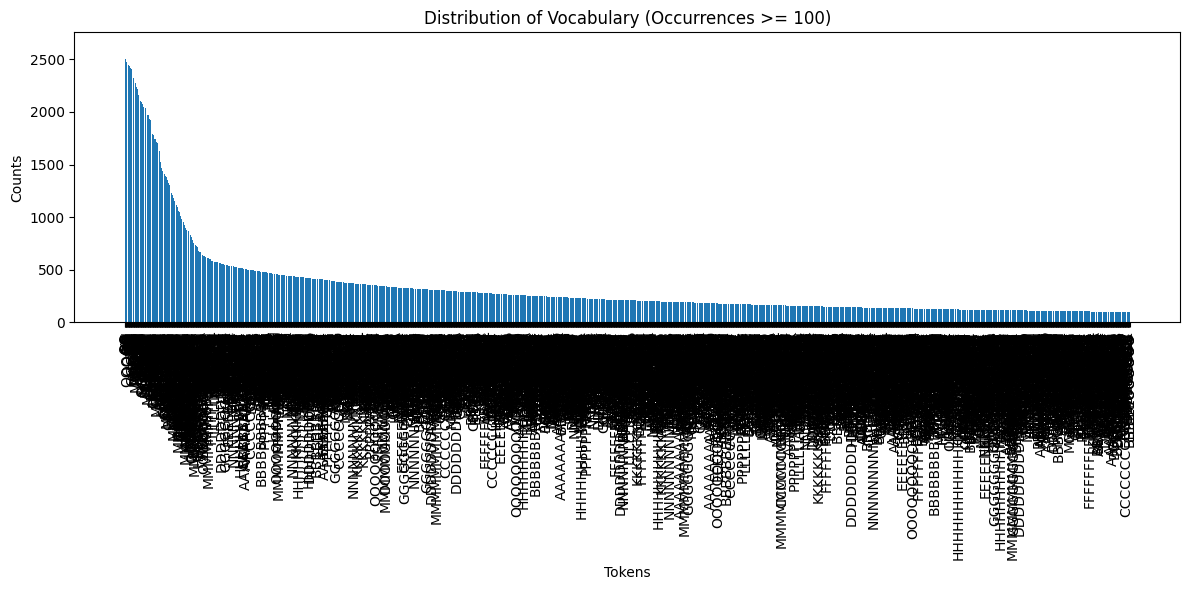

In [41]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 2431
vocab_count_decoded: 29555
recommended size vocab: 2559


In [43]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828